In [1]:
from sqlalchemy import create_engine
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)

In [25]:
df = pd.read_csv("data/flightdata.csv")

In [26]:
df.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_delay,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,month,year,day
0,0,2018-09-25,AA,1783,N178US,11057,"Charlotte, NC",14771,"San Francisco, CA",1829,0.0,17.0,4.0,2100,-19.0,0.0,NaN,0.0,331.0,312.0,291.0,2296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2018,25
1,1,2019-10-25,WN,2471,N264LV,15016,"St. Louis, MO",12953,"New York, NY",1255,15.0,12.0,6.0,1620,-2.0,0.0,NaN,0.0,145.0,128.0,110.0,888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2019,25
2,2,2019-09-18,DL,5459,N8891A,11057,"Charlotte, NC",11193,"Cincinnati, OH",920,92.0,30.0,4.0,1033,103.0,0.0,NaN,0.0,73.0,84.0,50.0,335.0,92.0,0.0,11.0,0.0,0.0,NaN,NaN,NaN,9,2019,18
3,3,2018-08-27,DL,702,N320NB,11278,"Washington, DC",11433,"Detroit, MI",1740,-8.0,40.0,7.0,1919,13.0,0.0,NaN,0.0,99.0,120.0,73.0,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2018,27
4,4,2019-03-01,WN,635,N916WN,13204,"Orlando, FL",12391,"Islip, NY",620,-4.0,15.0,4.0,850,-10.0,0.0,NaN,0.0,150.0,144.0,125.0,971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2019,1


In [27]:
# The remaining flights with null values in arr_delay have the same predicted arrival time as actual arrival time
df["arr_delay"].fillna(0, inplace=True)

In [28]:
# The remaining flights with null values in dep_delay have the same predicted departure time as actual departure time
df["dep_delay"].fillna(0, inplace=True)

In [29]:
# drop flights that weren't actually flights??? These all seem to be codeshares from hawaiian airlines.
df = df.dropna(subset=["air_time"])


In [30]:
df = df.drop(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num', 'tail_num', 
 'cancelled', 'cancellation_code', 
'diverted', 'actual_elapsed_time', 'air_time', 'year', 'day'], axis=1)

In [31]:
df.isnull().sum()

Unnamed: 0                  0
origin_airport_id           0
origin_city_name            0
dest_airport_id             0
dest_city_name              0
crs_dep_time                0
dep_delay                   0
taxi_out                    0
taxi_in                     0
crs_arr_time                0
arr_delay                   0
crs_elapsed_time            0
distance                    0
carrier_delay          395864
weather_delay          395864
nas_delay              395864
security_delay         395864
late_aircraft_delay    395864
first_dep_time         486730
total_add_gtime        486730
longest_add_gtime      486730
month                       0
dtype: int64

In [32]:
df.describe()

,Unnamed: 0,origin_airport_id,dest_airport_id,crs_dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_delay,crs_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,month
count,489930.000000,489930.000000,489930.000000,489930.000000,489930.000000,489930.000000,489930.000000,489930.000000,489930.000000,489930.000000,489930.000000,94066.000000,94066.000000,94066.000000,94066.000000,94066.000000,3200.000000,3200.000000,3200.000000,489930.000000
mean,250034.798555,12678.834305,12681.362752,1327.299529,10.441328,17.514586,7.675539,1483.431639,5.414543,138.130088,770.487953,20.394383,3.636245,16.293741,0.083920,27.395201,1323.451250,36.690312,36.254688,6.590029
std,144345.629845,1524.422455,1524.252983,488.881411,48.282321,9.991816,6.124006,515.366987,50.473983,71.653523,586.437280,63.946174,30.585423,38.475931,2.366404,55.197085,498.056669,30.396536,29.670470,3.399968
min,0.000000,10135.000000,10135.000000,1.000000,-147.000000,0.000000,0.000000,1.000000,-169.000000,-30.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000
25%,125038.250000,11292.000000,11292.000000,915.000000,-6.000000,11.000000,4.000000,1100.000000,-15.000000,87.000000,342.000000,0.000000,0.000000,0.000000,0.000000,0.000000,889.750000,17.000000,17.000000,4.000000
50%,250063.500000,12889.000000,12889.000000,1320.000000,-2.000000,15.000000,6.000000,1510.000000,-6.000000,120.000000,605.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1327.500000,28.000000,27.000000,7.000000
75%,375041.750000,14057.000000,14057.000000,1732.000000,6.000000,20.000000,9.000000,1915.000000,8.000000,167.000000,1005.000000,17.000000,0.000000,19.000000,0.000000,33.000000,1735.000000,46.000000,46.000000,10.000000
max,499999.000000,16869.000000,16869.000000,2359.000000,2962.000000,177.000000,242.000000,2400.000000,2965.000000,705.000000,5095.000000,1780.000000,1382.000000,1447.000000,288.000000,2962.000000,2359.000000,250.000000,209.000000,12.000000


In [33]:
# Drop flights that had a negative elapsed time for some reason
df = df[df["crs_elapsed_time"].gt(0)]

In [34]:
#if there is a nan in delay or added gate time, assume that it is 0
df = df.fillna(0)

In [35]:
# Creating bins & categories for distance

bin_distance=[0,600,1500,2500]
catg_distance=['Short','Medium','Long']
df['distance_catg']=pd.cut(df.distance, bin_distance, labels=catg_distance)

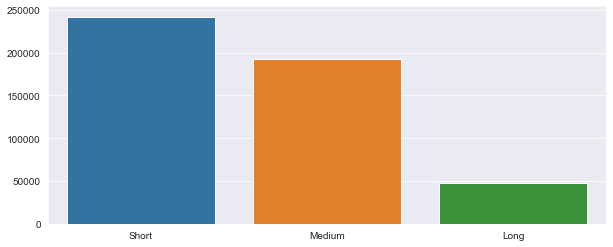

In [36]:
distanceBins = df.distance_catg.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=distanceBins.index, y=distanceBins.values)
plt.show()

<AxesSubplot:>

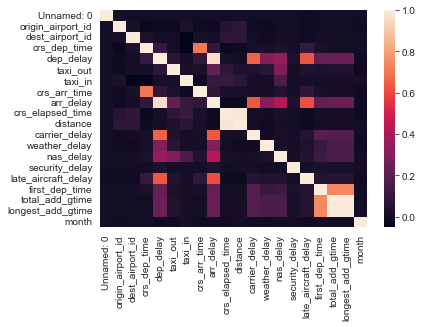

In [37]:
sns.heatmap(df.corr())

In [38]:
df.head()

,Unnamed: 0,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_delay,crs_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,month,distance_catg
0,0,11057,"Charlotte, NC",14771,"San Francisco, CA",1829,0.0,17.0,4.0,2100,-19.0,331.0,2296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,Long
1,1,15016,"St. Louis, MO",12953,"New York, NY",1255,15.0,12.0,6.0,1620,-2.0,145.0,888.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,Medium
2,2,11057,"Charlotte, NC",11193,"Cincinnati, OH",920,92.0,30.0,4.0,1033,103.0,73.0,335.0,92.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,9,Short
3,3,11278,"Washington, DC",11433,"Detroit, MI",1740,-8.0,40.0,7.0,1919,13.0,99.0,405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,Short
4,4,13204,"Orlando, FL",12391,"Islip, NY",620,-4.0,15.0,4.0,850,-10.0,150.0,971.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Medium


In [39]:
df = df.drop(['Unnamed: 0'], axis=1)

In [40]:
#commpletely correlated with the total
df = df.drop(['longest_add_gtime'], axis=1)

<AxesSubplot:>

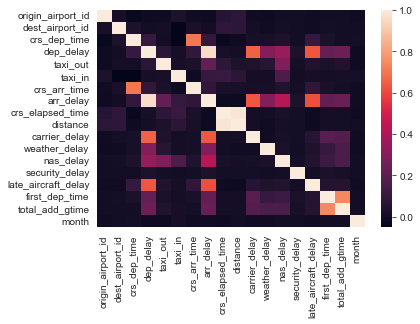

In [41]:
sns.heatmap(df.corr())

In [42]:
# Creating bins & categories for time

bin_time=[000,600,1200,1800,2400]
catg_time=['Wee Hours','Morning','Afternoon','Night']
df['time_of_day']=pd.cut(df.crs_dep_time, bin_time, labels=catg_time)

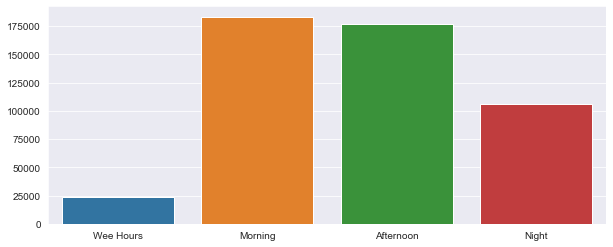

In [43]:
timeBins = df.time_of_day.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=timeBins.index, y=timeBins.values)
plt.show()

In [44]:
df.to_csv('data/cleanflight.csv')